# Assignment 5
# Submitted by : Arshad Ali (214102301)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import scipy.fft
from numpy import sin,cos,pi,exp,sqrt
from scipy.signal import butter, lfilter
from scipy import signal
import time

In [11]:
import warnings
warnings.filterwarnings('ignore')

##  1(a)

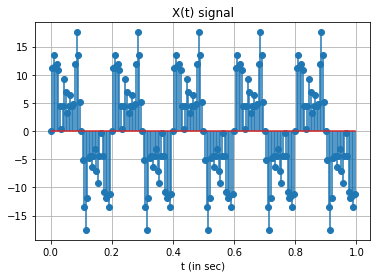

In [10]:
t = np.arange(0,1,1/200)
f1 = 5
f2 = 15
f3 = 25
f4 = 50
x = 9*sin(2*pi*f1*t)+7*sin(2*pi*f2*t)+5*sin(2*pi*f3*t)+3*sin(2*pi*f4*t)

plt.stem(t,x)
plt.title('X(t) signal')
plt.xlabel('t (in sec)')
plt.grid()

## 1(b)

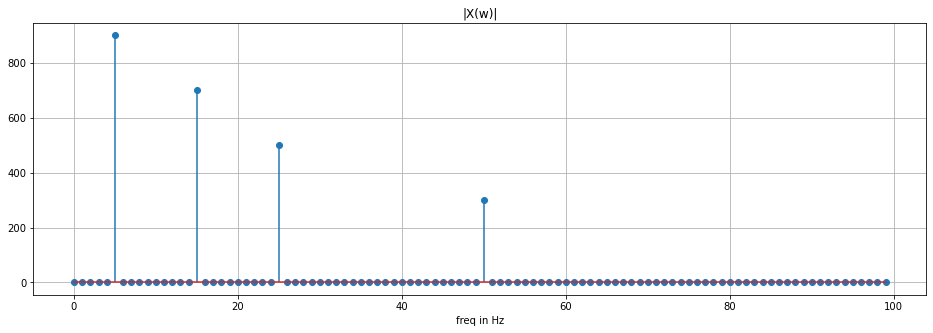

In [11]:
def DFT(x):
    N = len(x)
    ans = []
    for k in range(N):
        dft = 0
        for n in range(N):
            dft += x[n]*np.exp(-2j*np.pi*k*n/N)
        ans.append(dft)
    return ans

X_k = DFT(x)[0:100]
k = np.arange(len(x)/2)

plt.figure(figsize=(16,5))
plt.stem(k,np.absolute(X_k))
plt.title('|X(w)|')
plt.xlabel('freq in Hz')
plt.grid()
plt.show()

## 1(c)

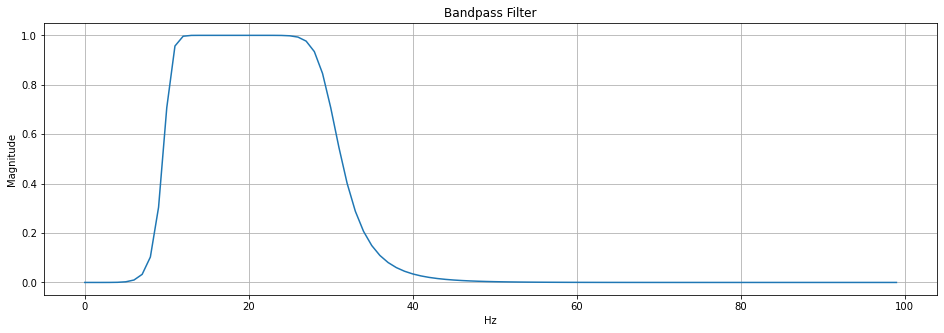

In [12]:
b, a = signal.butter(6,[10,30] , 'bp', fs=200)
w, h = signal.freqz(b, a, worN=100)

plt.figure(figsize=(16,5))
plt.plot(np.abs(h))
plt.title('Bandpass Filter')
plt.xlabel('Hz')
plt.ylabel('Magnitude')
plt.grid()

## 1(d)

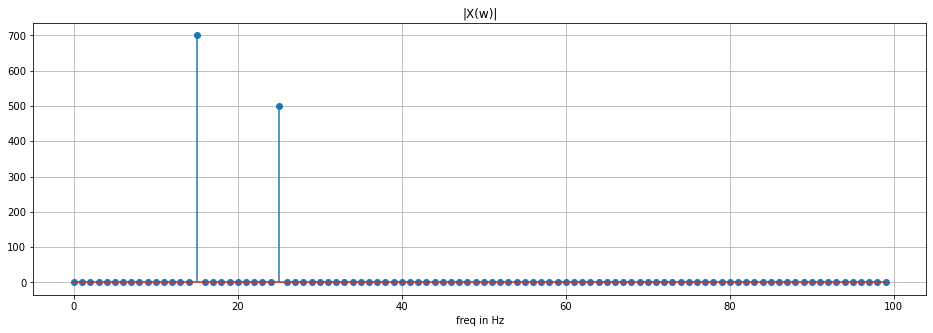

In [13]:
X_multiplied = X_k*h

plt.figure(figsize=(16,5))
plt.stem(k,np.absolute(X_multiplied))
plt.title('|X(w)|')
plt.xlabel('freq in Hz')
plt.grid()
plt.show()

## 1(e)

C:\Users\Arshad\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


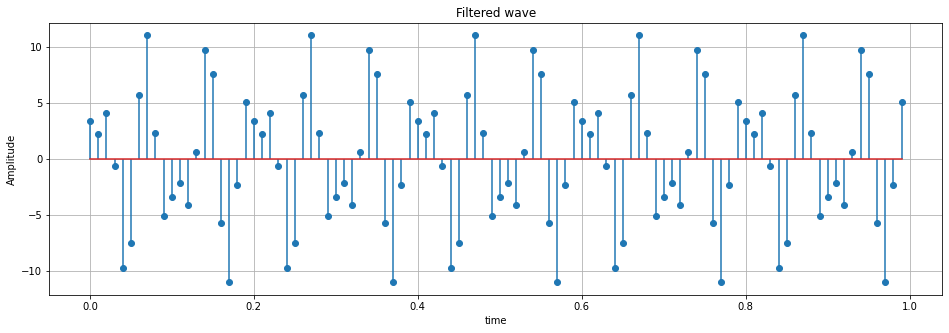

In [16]:
def inv_DFT(X):
    N = len(X)
    x = []
    for n in range(N):
        xn = 0
        for k in range(N):
            xn += X[k]*np.exp(2j*np.pi*k*n/N)/N
        x.append(xn)
    return x
        
xn = inv_DFT(X_multiplied)

t = np.arange(0,1,1/100)

plt.figure(figsize=(16,5))
plt.stem(t,xn)
plt.title('Filtered wave')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

## 3(a)

In [155]:
num = [-0.2,0.18,0.4,1]
den=[1,0.4,0.18,-0.2]
zeros,poles,k=signal.tf2zpk(num, den)
print("Zeros=",zeros)
print("Poles=",poles)

Zeros= [ 2.5+0.j         -0.8+1.16619038j -0.8-1.16619038j]
Poles= [-0.4+0.58309519j -0.4-0.58309519j  0.4+0.j        ]


**Poles(P) and zeros(Z) follows the relationship Z = 1/P***

**So the given filter is All-pass filter**

## 3(b)

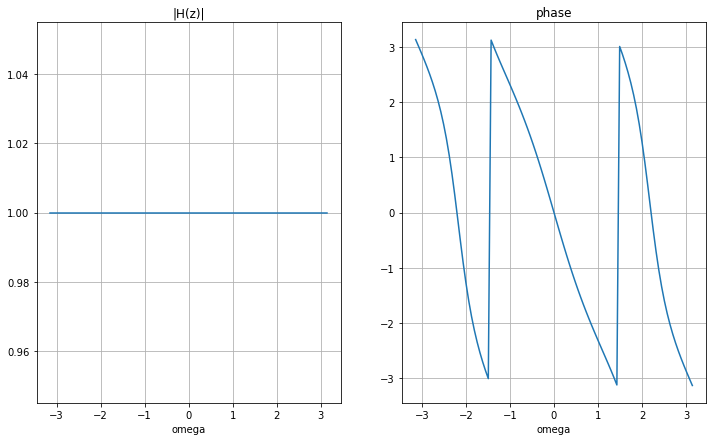

In [52]:
w = np.linspace(-np.pi,np.pi,100)
z = np.exp(1j*w)

num = (-0.2*(z**3))+(0.18*(z**2))+(0.4*z)+1
den = (z**3)+(0.4*(z**2))+(0.18*z)-0.2
H_z = num/den
mag = np.abs(H_z)
phase = np.angle(H_z)

fig, ax=plt.subplots(1,2,figsize=(12,7))        
ax[0].plot(w,mag)
ax[0].set_title('|H(z)|')
ax[0].set_xlabel("omega")
ax[0].grid()
ax[1].plot(w,phase)
ax[1].set_title('phase')
ax[1].set_xlabel("omega")
ax[1].grid()

## 4

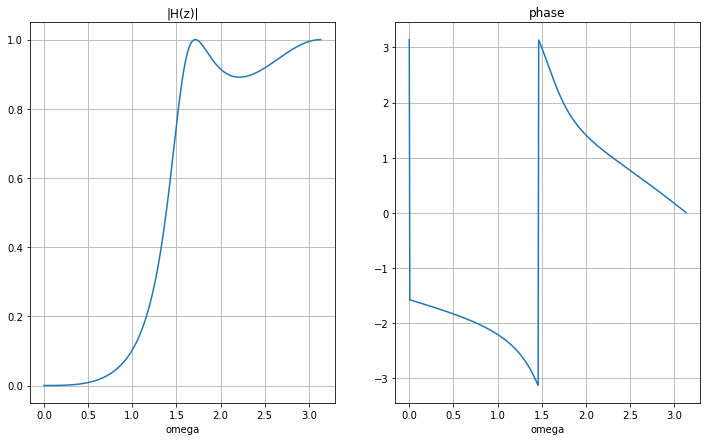

In [209]:
b, a = signal.cheby1(3, 1, 2000, 'hp', fs=8000)

zeros = np.roots(b)
poles = np.roots(a)

w, z = signal.freqz(b,a)

mag = np.absolute(z)
phase = np.angle(z)

fig, ax=plt.subplots(1,2,figsize=(12,7))        
ax[0].plot(w,mag)
ax[0].set_title('|H(z)|')
ax[0].set_xlabel("omega")
ax[0].grid()
ax[1].plot(w,phase)
ax[1].set_title('phase')
ax[1].set_xlabel("omega")
ax[1].grid()

Poles:  [-0.00232899+0.77640918j -0.00232899-0.77640918j -0.33853523+0.j        ]
Zeros:  [1.00000205+3.55693933e-06j 1.00000205-3.55693933e-06j
 0.99999589+0.00000000e+00j]


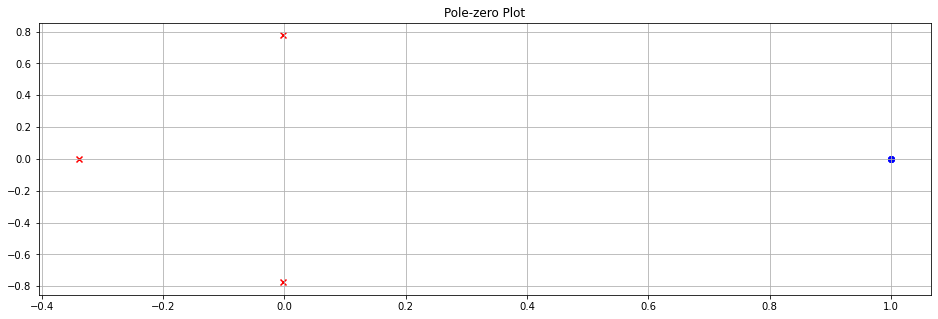

In [212]:
plt.figure(figsize=(16,5))
    
for z in zeros:
    plt.scatter(np.real(z),np.imag(z),marker='o',color='b')
for p in poles:
    plt.scatter(np.real(p),np.imag(p),marker='x',color='r')

plt.grid()
plt.title("Pole-zero Plot")
print("Poles: ",poles)
print("Zeros: ",zeros)

## 5

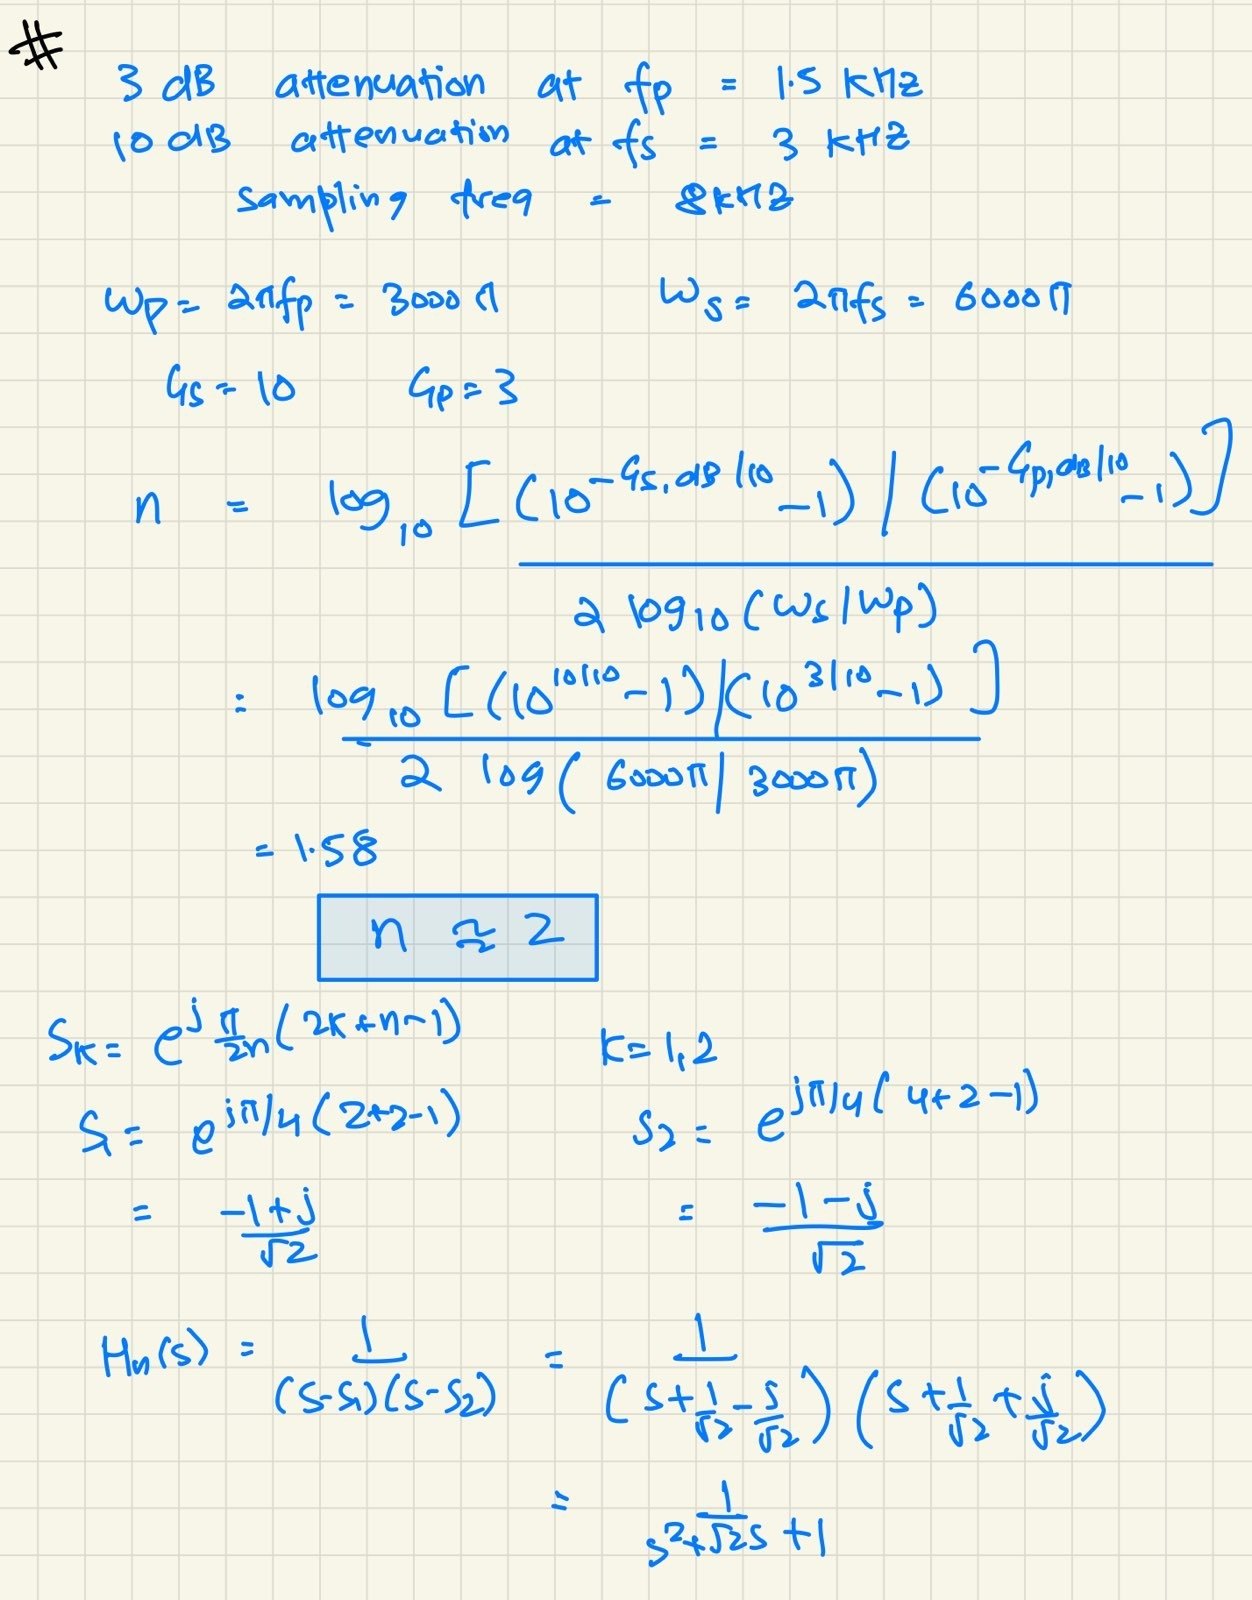

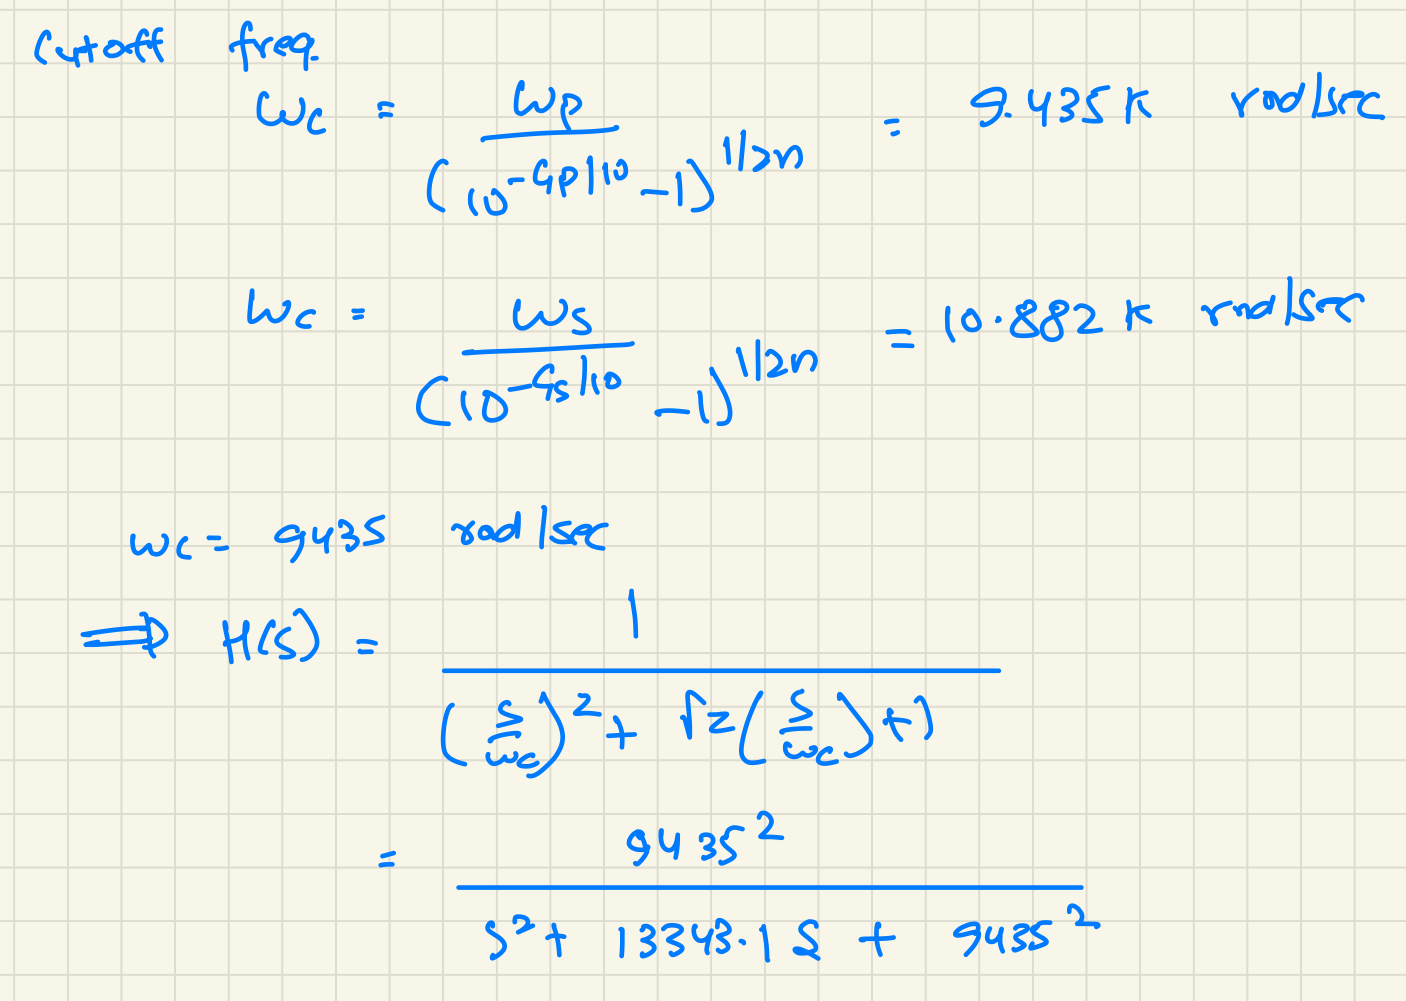

In [17]:
w = np.linspace(0,6*np.pi,100)
s = 1j*w

TF = (9435**2)/((s**2)+(13343.1*s)+(9435**2))

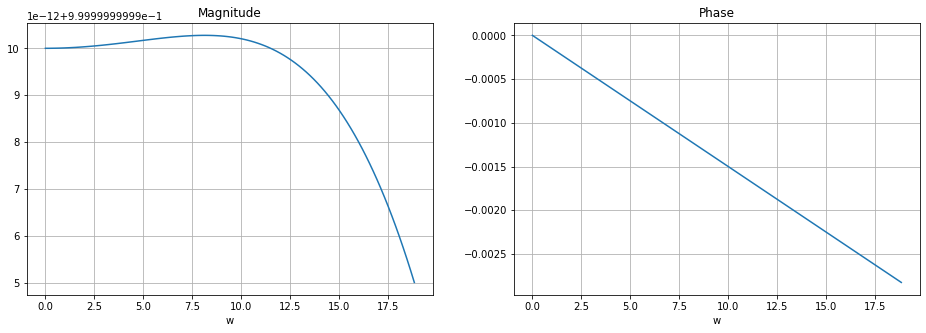

In [19]:
fig, ax=plt.subplots(1,2,figsize=(16,5)) 
ax[0].plot(w,np.abs(TF))
ax[0].set_title('Magnitude')
ax[0].set_xlabel("w")
ax[0].grid()
ax[1].plot(w,np.angle(TF))
ax[1].set_title('Phase')
ax[1].set_xlabel("w")
ax[1].grid()

## 6(a)

In [174]:
N=1024
x = np.random.rand(N)

def DFT(x):
    N = len(x)
    ans = []
    for k in range(N):
        dft = 0
        for n in range(N):
            dft += x[n]*np.exp(-2j*np.pi*k*n/N)
        ans.append(dft)
    return ans

start = time.time()
DFT_x_a = DFT(x)
end = time.time()
run_time_a = end-start

print("Number of computations for calculating DFT:")
print("Complex multiplication = ",N**2)
print("Complex Addition = ",N*(N-1))

print("\nTime to calculate DFT = ",run_time_a,"sec")

Number of computations for calculating DFT:
Complex multiplication =  1048576
Complex Addition =  1047552

Time to calculate DFT =  5.0573015213012695 sec


## 6(b)

In [173]:
N=1024
x = np.random.rand(N)

start_b = time.time()
DFT_x_b = np.fft.fft(x)
end_b = time.time()
run_time_b = end_b-start_b
print("Time to calculate DFT =",run_time_b,"sec")

Time to calculate DFT = 0.0 sec


## 6(c)

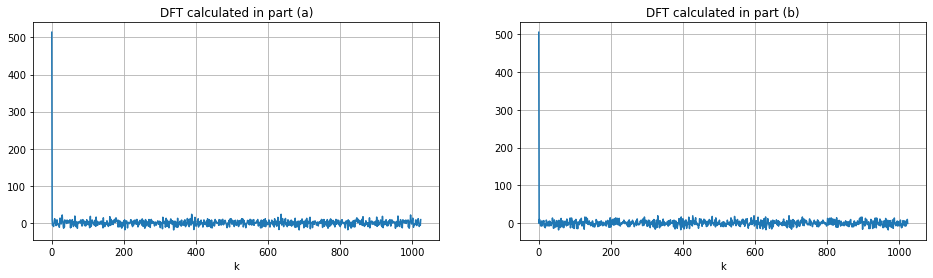

In [171]:
# Yes answers in part(a) and part(b) are similar

n = np.arange(N)

fig, ax=plt.subplots(1,2,figsize=(16,4))        
ax[0].plot(n,DFT_x_a)
ax[0].set_title('DFT calculated in part (a)')
ax[0].set_xlabel("k")
ax[0].grid()
ax[1].plot(n,DFT_x_b)
ax[1].set_title('DFT calculated in part (b)')
ax[1].set_xlabel("k")
ax[1].grid()

## 6(d)

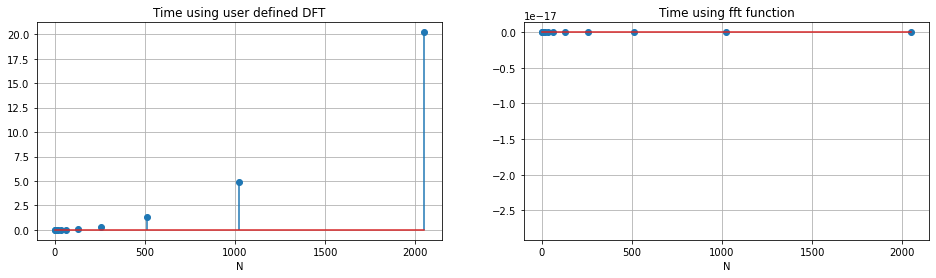

In [183]:
N_values = [2**i for i in range(0,12)]
time_a = []
time_b = []

for N in N_values:
    x = np.random.randn(N)
    
    start_a = time.time()
    dft_a = DFT(x)
    end_a = time.time()
    run_time_a = end_a - start_a
    time_a.append(run_time_a)
    
    start_b = time.time()
    dft_b = np.fft.fft(x)
    end_b = time.time()
    run_time_b = end_b - start_b
    time_b.append(run_time_b)
    
fig, ax=plt.subplots(1,2,figsize=(16,4))

ax[0].stem(N_values,time_a)
ax[0].set_title('Time using user defined DFT')
ax[0].set_xlabel("N")
ax[0].grid()

ax[1].stem(N_values,time_b)
ax[1].set_title('Time using fft function')
ax[1].set_xlabel("N")
ax[1].grid()

## 7

Time to calculate  0.001995563507080078  secs


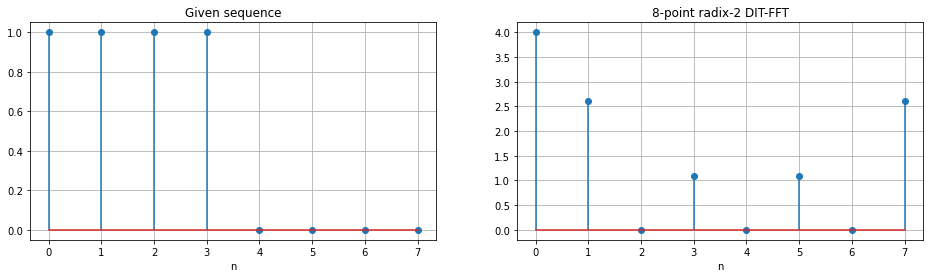

In [196]:
start = time.time()

x = [1,1,1,1,0,0,0,0]
w = np.exp(-1j*2*np.pi/8)

x1 = np.zeros(8,dtype=complex)

x1[0] = x[0] + x[4]
x1[1] = x[0] - x[4]

x1[2] = x[2] + x[6]
x1[3] = x[2] - x[6]

x1[4] = x[1] + x[5]
x1[5] = x[1] - x[5]

x1[6] = x[3] + x[7]
x1[7] = x[3] - x[7]



x2 = np.zeros(8,dtype=complex)

x2[0] = x1[0] + (w**0)*x1[2]
x2[1] = x1[1] + (w**2)*x1[3]
x2[2] = x1[0] - (w**0)*x1[2]
x2[3] = x1[1] - (w**2)*x1[3]

x2[4] = x1[4] + (w**0)*x1[6]
x2[5] = x1[5] + (w**2)*x1[7]
x2[6] = x1[4] - (w**0)*x1[6]
x2[7] = x1[5] - (w**2)*x1[7]

x3 = np.zeros(8,dtype=complex)

x3[0] = x2[0] + (w**0)*x2[4]
x3[1] = x2[1] + (w**1)*x2[5]
x3[2] = x2[2] + (w**2)*x2[6]
x3[3] = x2[3] + (w**3)*x2[7]
x3[4] = x2[0] - (w**0)*x2[4]
x3[5] = x2[1] - (w**1)*x2[5]
x3[6] = x2[2] - (w**2)*x2[6]
x3[7] = x2[3] - (w**3)*x2[7]


end = time.time()
print("Time to calculate ",end-start," secs")

n = np.arange(8)
fig, ax=plt.subplots(1,2,figsize=(16,4))

ax[0].stem(n,x)
ax[0].set_title('Given sequence')
ax[0].set_xlabel("n")
ax[0].grid()

ax[1].stem(n,np.absolute(x3))
ax[1].set_title('8-point radix-2 DIT-FFT')
ax[1].set_xlabel("n")
ax[1].grid()

## 8

Time to calculate  0.000997304916381836  secs


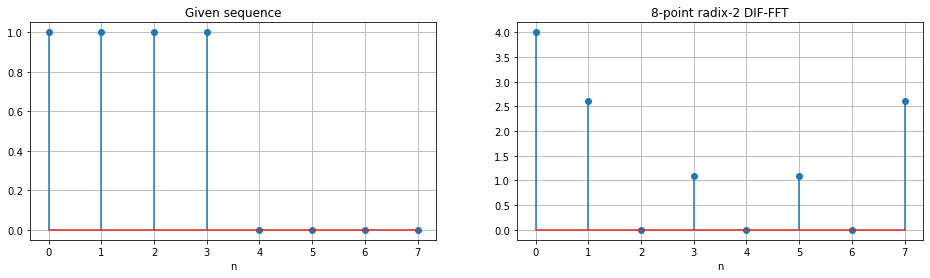

In [9]:
start = time.time()

x = [1,1,1,1,0,0,0,0]
w = np.exp(-1j*2*np.pi/8)

x1 = np.zeros(8,dtype=complex)

x1[0] = x[0] + x[4]
x1[1] = x[1] + x[5]
x1[2] = x[2] + x[6]
x1[3] = x[3] + x[7]
x1[4] = (x[0] - x[4])*(w**0)
x1[5] = (x[1] - x[5])*(w**1)
x1[6] = (x[2] - x[6])*(w**2)
x1[7] = (x[3] - x[7])*(w**3)


x2 = np.zeros(8,dtype=complex)

x2[0] = x1[0] + x1[2]
x2[1] = x1[1] + x1[3]
x2[2] = (x1[0] - x1[2])*(w**0)
x2[3] = (x1[1] - x1[3])*(w**2)
x2[4] = x1[4] + x1[6]
x2[5] = x1[5] + x1[7]
x2[6] = (x1[4] - x1[6])*(w**0)
x2[7] = (x1[5] - x1[7])*(w**2)


x3 = np.zeros(8,dtype=complex)

x3[0] = x2[0] + x2[1]
x3[4] = x2[0] - x2[1]
x3[2] = x2[2] + x2[3]
x3[6] = x2[2] - x2[3]
x3[1] = x2[4] + x2[5]
x3[5] = x2[4] - x2[5]
x3[3] = x2[6] + x2[7]
x3[7] = x2[6] - x2[7]

end = time.time()
print("Time to calculate ",end-start," secs")


n = np.arange(8)
fig, ax=plt.subplots(1,2,figsize=(16,4))

ax[0].stem(n,x)
ax[0].set_title('Given sequence')
ax[0].set_xlabel("n")
ax[0].grid()

ax[1].stem(n,np.absolute(x3))
ax[1].set_title('8-point radix-2 DIF-FFT')
ax[1].set_xlabel("n")
ax[1].grid()

## 9

In [20]:
# Convolution function 
def conv_func(x_n,h_n):
    l1 = len(x_n)
    l2 = len(h_n)
    n = l1 + l2 - 1
    
    y=np.zeros(n)
    
    for i in range(n):   
        for k in range(l1):
            if(i-k < 0 or  (i-k)>=l2):
                y[i] += 0
            else:
                y[i] += x_n[k]*h_n[i-k]
    return y
    
    
x_n = [1,2,3,1]
h_n = [1,1,1]
print("Linear convolution: ",conv_func(x_n,h_n))

Linear convolution:  [1. 3. 6. 6. 4. 1.]


**To implement circular convolution of xn and hn using FFT, multiply FFT of xn and hn and then take inverse FFT of result to get circular convolution**